In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Load data
X_full = np.load('/content/drive/MyDrive/preprocessed/X_full.npy')
y_full = np.load('/content/drive/MyDrive/preprocessed/y_full.npy')

# Split data (stratified)
X_train, X_temp, y_train, y_temp = train_test_split(X_full, y_full, test_size=0.2, stratify=y_full, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [ ]:
save_dir = "/content/drive/MyDrive/fall_results/"
import os
os.makedirs(save_dir, exist_ok=True)

In [ ]:
from tensorflow.keras.layers import GRU, Bidirectional, Conv1D, MaxPooling1D, Flatten
import time

# Store histories and timings
histories = {}
inference_times = {}

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_gru_model(input_shape):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(32),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(LSTM(32)),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    return model



🧠 Training LSTM model...
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6281 - loss: 0.6327 - val_accuracy: 0.6000 - val_loss: 0.6220
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6079 - loss: 0.6297 - val_accuracy: 0.6000 - val_loss: 0.5817
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6492 - loss: 0.5821 - val_accuracy: 0.8000 - val_loss: 0.5392
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7896 - loss: 0.5450 - val_accuracy: 0.9200 - val_loss: 0.4928
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8128 - loss: 0.5086 - val_accuracy: 0.9200 - val_loss: 0.4426
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9073 - loss: 0.4491 - val_accuracy: 0.9600 - val_loss: 0.3873
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9294 - loss: 0.4100 - val_accuracy: 1.0000 - val_loss: 0.3263
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9501 - loss: 0.3705 - val_accuracy: 1.0000 - val_loss: 0.2705
Epoch 9/30


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

📊 LSTM Evaluation Metrics:
Accuracy : 0.9900
Precision: 1.0000
Recall   : 0.9750
F1 Score : 0.9873
Inference time per sample: 0.002041 sec


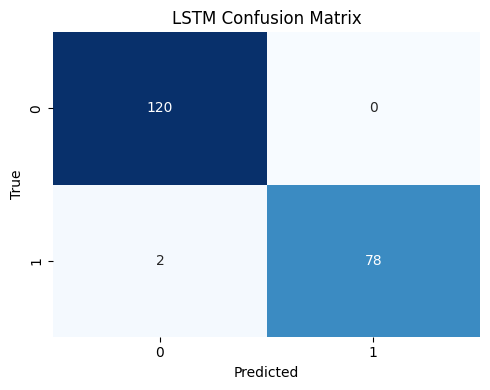


🧠 Training GRU model...
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.3441 - loss: 0.7587 - val_accuracy: 0.4000 - val_loss: 0.7423
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4760 - loss: 0.7282 - val_accuracy: 0.6000 - val_loss: 0.7173
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4991 - loss: 0.7174 - val_accuracy: 0.6000 - val_loss: 0.6967
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5840 - loss: 0.7016 - val_accuracy: 0.6000 - val_loss: 0.6793
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5461 - loss: 0.7042 - val_accuracy: 0.6000 - val_loss: 0.6638
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5858 - loss: 0.6718 - val_accuracy: 0.6000 - val_loss: 0.6486
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6168 - loss: 0.6712 - val_accuracy: 0.6000 - val_loss: 0.6343
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6444 - loss: 0.6213 - val_accuracy: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

📊 GRU Evaluation Metrics:
Accuracy : 0.9750
Precision: 1.0000
Recall   : 0.9375
F1 Score : 0.9677
Inference time per sample: 0.001809 sec


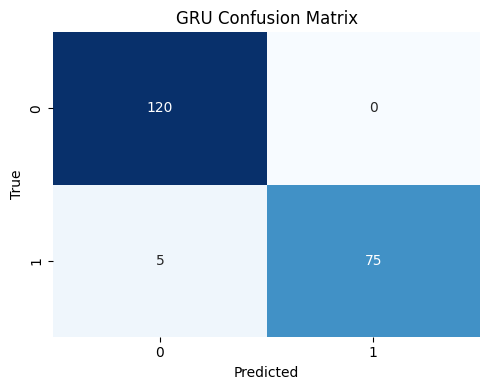


🧠 Training BiLSTM model...
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5708 - loss: 0.6822 - val_accuracy: 0.6000 - val_loss: 0.6216
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6419 - loss: 0.6220 - val_accuracy: 0.6400 - val_loss: 0.5782
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6533 - loss: 0.5815 - val_accuracy: 0.8400 - val_loss: 0.5118
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8833 - loss: 0.5206 - val_accuracy: 0.9600 - val_loss: 0.4465
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9118 - loss: 0.4825 - val_accuracy: 1.0000 - val_loss: 0.3794
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9526 - loss: 0.4253 - val_accuracy: 0.9600 - val_loss: 0.3178
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9350 - loss: 0.3611 - val_accuracy: 0.9600 - val_loss: 0.2602
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9401 - loss: 0.3148 - val_accurac

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step

📊 BiLSTM Evaluation Metrics:
Accuracy : 0.9900
Precision: 1.0000
Recall   : 0.9750
F1 Score : 0.9873
Inference time per sample: 0.006703 sec


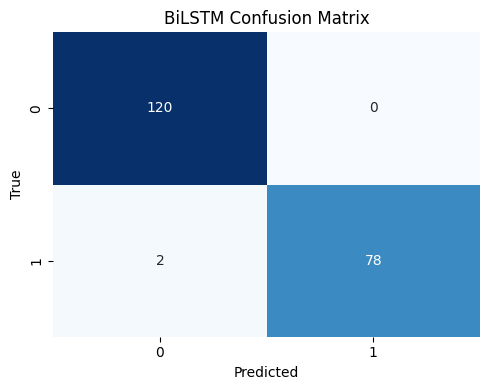

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

models = {
    'LSTM': build_lstm_model(X_train.shape[1:]),
    'GRU': build_gru_model(X_train.shape[1:]),
    'BiLSTM': build_bilstm_model(X_train.shape[1:])
}

for name, model in models.items():
    print(f"\n🧠 Training {name} model...")
    model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, verbose=1)
    histories[name] = history.history

    # Save model
    model.save(f"{save_dir}/{name}_model.h5")

    # Inference timing
    start = time.time()
    y_pred_probs = model.predict(X_train, batch_size=32)
    end = time.time()
    avg_inference_time = (end - start) / len(X_train)
    inference_times[name] = avg_inference_time

    # Threshold predictions
    y_pred = (y_pred_probs > 0.5).astype("int32")

    # Evaluation metrics
    acc = accuracy_score(y_train, y_pred)
    prec = precision_score(y_train, y_pred)
    rec = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    print(f"\n📊 {name} Evaluation Metrics:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"Inference time per sample: {avg_inference_time:.6f} sec")

    # Confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(f"{save_dir}/{name}_confusion_matrix.png")
    plt.show()


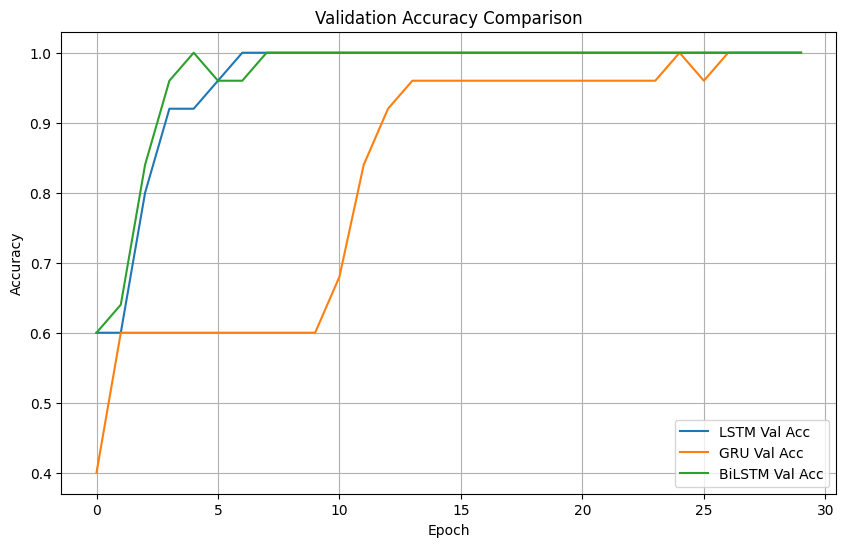

In [ ]:
plt.figure(figsize=(10, 6))
for name, hist in histories.items():
    plt.plot(hist['val_accuracy'], label=f'{name} Val Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig(f"{save_dir}/val_accuracy_comparison.png")
plt.show()


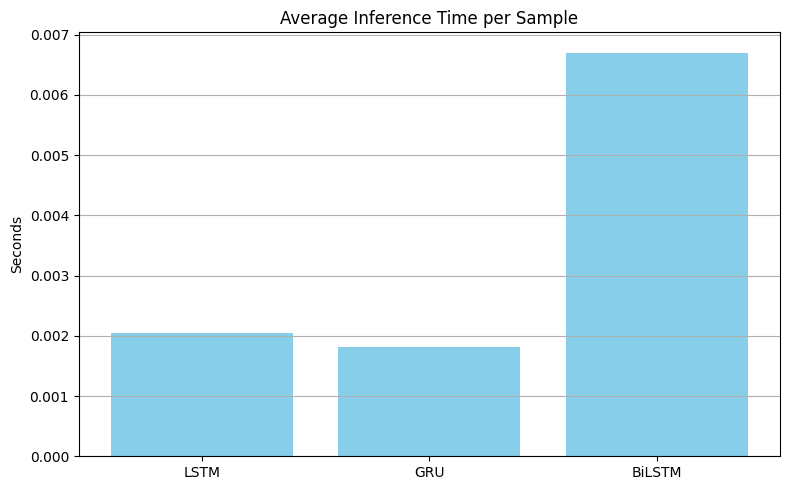

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(inference_times.keys(), inference_times.values(), color='skyblue')
plt.title('Average Inference Time per Sample')
plt.ylabel('Seconds')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(f"{save_dir}/inference_time_comparison.png")
plt.show()


In [ ]:
from tabulate import tabulate

# Collect and print a summary table
metrics_summary = []

for name in models.keys():
    y_pred_probs = models[name].predict(X_train)
    y_pred = (y_pred_probs > 0.5).astype("int32")

    acc = accuracy_score(y_train, y_pred)
    prec = precision_score(y_train, y_pred)
    rec = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    inf_time = inference_times[name]

    metrics_summary.append([name, f"{acc:.4f}", f"{prec:.4f}", f"{rec:.4f}", f"{f1:.4f}", f"{inf_time:.6f}"])

# Print as a clean table
print(tabulate(metrics_summary, headers=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Inference Time (s/sample)"], tablefmt="pretty"))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
+--------+----------+-----------+--------+----------+---------------------------+
| Model  | Accuracy | Precision | Recall | F1 Score | Inference Time (s/sample) |
+--------+----------+-----------+--------+----------+---------------------------+
|  LSTM  |  0.9900  |  1.0000   | 0.9750 |  0.9873  |         0.002041          |
|  GRU   |  0.9750  |  1.0000   | 0.9375 |  0.9677  |         0.001809          |
| BiLSTM |  0.9900  |  1.0000   | 0.9750 |  0.9873  |         0.006703          |
+--------+----------+-----------+--------+----------+---------------------------+
